<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Evaluating SVM on Multiple Datasets

_Authors: Kiefer Katovich (SF)_

---

In this lab you can explore several datasets with SVM classifiers compared to logistic regression and kNN classifiers. 

Your datasets folder has these four datasets to choose from for the lab:

**Breast cancer**

    ./datasets/breast_cancer_wisconsin

**Spambase**

    ./datasets/spam

**Car evaluation**

    ./datasets/car_evaluation


In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

from sklearn.svm import SVC

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn import svm, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

### 1. Load the breast cancer data

- Are there any missing values? Impute or clean if so.
- Select a classification target and predictors.

In [198]:
'''Loading the Cancer dastaset and validating the columns using the head method'''

cancer = pd.read_csv('datasets/breast_cancer_wisconsin/breast_cancer.csv')
cancer.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [199]:
cancer['Bare_Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'], dtype=object)

In [200]:
cancer.loc[cancer['Bare_Nuclei'] == '?',: ]

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [201]:
cancer = cancer[cancer.Bare_Nuclei != '?']

In [202]:
'''
1. There ia Class column in the dataset. The class column is the target variable
2. We are also going to validate the column values in this column
'''
cancer.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

In [203]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             683 non-null int64
Clump_Thickness                683 non-null int64
Uniformity_of_Cell_Size        683 non-null int64
Uniformity_of_Cell_Shape       683 non-null int64
Marginal_Adhesion              683 non-null int64
Single_Epithelial_Cell_Size    683 non-null int64
Bare_Nuclei                    683 non-null object
Bland_Chromatin                683 non-null int64
Normal_Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


We see that there are no non null columns. However we do see a column 'Bare Nuclei' that is a non-null column. 

In [204]:
cancer['Bare_Nuclei'] = cancer['Bare_Nuclei'].astype(str).astype(float)

In [205]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             683 non-null int64
Clump_Thickness                683 non-null int64
Uniformity_of_Cell_Size        683 non-null int64
Uniformity_of_Cell_Shape       683 non-null int64
Marginal_Adhesion              683 non-null int64
Single_Epithelial_Cell_Size    683 non-null int64
Bare_Nuclei                    683 non-null float64
Bland_Chromatin                683 non-null int64
Normal_Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


We have dropped the NAN columns

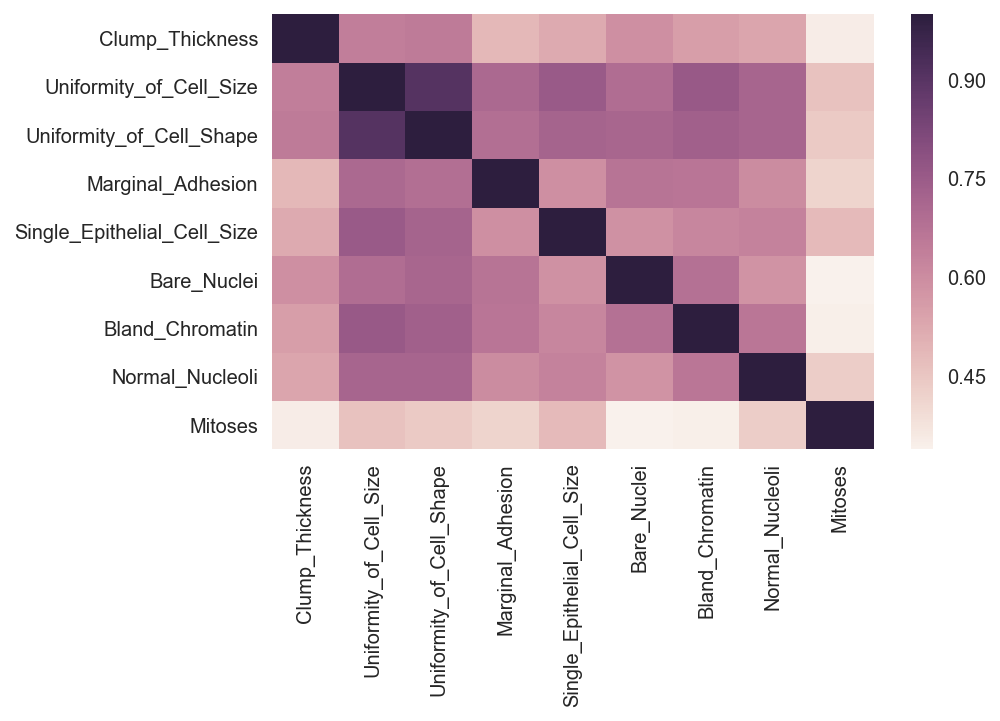

In [209]:
cancer_features = cancer.loc[: , 'Clump_Thickness': 'Mitoses']
sns.heatmap(cancer_features.corr())

In [210]:
ss = StandardScaler()
ss.fit_transform(cancer_features)

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ..., 
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [211]:
def class_encode(X): 
    if int(X) == 2: 
        return 0 
    else: 
        return 1 

In [212]:
'''Encoding Class Colums'''
cancer['Class'] = cancer['Class'].apply(class_encode)

In [213]:
'''Validating the encoded Values'''
cancer.Class.value_counts()

0    444
1    239
Name: Class, dtype: int64

In [214]:
'''Setting up the X & Y (Predictor and Target Variables)'''

X = cancer_features
y = cancer['Class']

### 2. Build an SVM classifier on the data

For details on the SVM classifier, see here:

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 5-fold cross validation?
- Repeat using a radial basis function (rbf) classifier. Compare the scores. Which one is better?
- Print a confusion matrix and classification report for your best model using training & testing data.

Classification report:

```python
http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
```

Confusion matrix:

```python
df_confusion = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
```

In [228]:
'''1: Baseline Accuracy'''
y.value_counts()/len(y)

0    0.650073
1    0.349927
Name: Class, dtype: float64

In [229]:
'''2: SVM Linear Score'''
svm_linear = svm.SVC(kernel='linear')
score = cross_val_score(svm_linear, X,y, cv=5, scoring='accuracy')
print ('Linear SVM Score: ', score)
print ('Mean SVM Score: ', score.mean())

Linear SVM Score:  [ 0.94890511  0.94890511  0.97810219  0.97080292  0.98518519]
Mean SVM Score:  0.96638010273


In [230]:
'''3: Non Linear Score'''
svm_rbf = svm.SVC(kernel='rbf')
score = cross_val_score(svm_rbf, X,y, cv=5, scoring='accuracy')
print ('Non Linear SVM Score: ', score)
print ('Mean Non Linear SVM Score: ', score.mean())

Non Linear SVM Score:  [ 0.90510949  0.91240876  0.96350365  0.98540146  0.98518519]
Mean Non Linear SVM Score:  0.95032170857


We notice that the scores are more or less the aame 

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

In [236]:
svm_linear_fit = svm_linear.fit(X_train, y_train)
svm_linear_fit

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [238]:
'''Scoring the Model with Training set'''
svm_linear_fit.score(X_train, y_train)

0.97592997811816196

In [239]:
'''Scoring the Model with Test set'''
svm_linear_fit.score(X_test, y_test)

0.96017699115044253

In [237]:
'''Predicting the Y Values'''
y_predict = svm_linear_fit.predict(X_test)

In [247]:
'''Creating the Confusion Matrix '''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm, columns=('Pred_0', 'Pred_1'), index=('Actual_0', 'Actual_1'))
cm_df

,Pred_0,Pred_1
Actual_0,146,3
Actual_1,6,71


In [250]:
'''Creating the Classification Report '''
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predict, digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       149
          1       0.96      0.92      0.94        77

avg / total       0.96      0.96      0.96       226



#### 2.2 Are there more false positives or false negatives? Is this good or bad?


We notice that there are more false negatives than false positives. In this scenario, it is bad, because it means that we predicted that the patients did not have cancer,but in reality they had cancer

### 3. Perform the steps above with a different dataset.

Repeat each step.

In [252]:
cars = pd.read_csv('datasets/car_evaluation/car.csv')
cars.head()

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [253]:
spam = pd.read_csv('datasets/spam/spam_words_wide.csv')
spam.head()

,is_spam,getzed,86021,babies,sunoco,ultimately,thk,voted,spatula,fiend,...,itna,borin,thoughts,iccha,videochat,freefone,pist,reformat,strict,69698
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [255]:
spam.describe()

,is_spam,getzed,86021,babies,sunoco,ultimately,thk,voted,spatula,fiend,...,itna,borin,thoughts,iccha,videochat,freefone,pist,reformat,strict,69698
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,...,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,0.001795,0.001077,0.000359,0.000179,0.000179,0.008435,0.000179,0.000179,0.000179,...,0.000179,0.000359,0.000359,0.000179,0.000897,0.000718,0.000179,0.000179,0.000179,0.000179
std,0.340751,0.042330,0.032800,0.018944,0.013397,0.013397,0.091462,0.013397,0.013397,0.013397,...,0.013397,0.018944,0.018944,0.013397,0.029945,0.026786,0.013397,0.013397,0.013397,0.013397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [256]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Columns: 1001 entries, is_spam to 69698
dtypes: int64(1001)
memory usage: 42.6 MB


In [257]:
spam.columns

Index(['is_spam', 'getzed', '86021', 'babies', 'sunoco', 'ultimately', 'thk',
       'voted', 'spatula', 'fiend',
       ...
       'itna', 'borin', 'thoughts', 'iccha', 'videochat', 'freefone', 'pist',
       'reformat', 'strict', '69698'],
      dtype='object', length=1001)

In [264]:
X = spam.iloc[:, 1: ]
y = spam.iloc[:, 0 ]

There is no value in plotting a heatmap as there a lot of features and plotting a heatmap will only look cluttered with very little value

In [266]:
'''1: Baseline Accuracy'''
y.value_counts()/len(y)

0    0.865937
1    0.134063
Name: is_spam, dtype: float64

In [267]:
'''2: SVM Linear Score'''
svm_linear = svm.SVC(kernel='linear')
score = cross_val_score(svm_linear, X,y, cv=5, scoring='accuracy')
print ('Linear SVM Score: ', score)
print ('Mean SVM Score: ', score.mean())

Linear SVM Score:  [ 0.94170404  0.93632287  0.93895871  0.94165171  0.9470377 ]
Mean SVM Score:  0.941135004146


In [268]:
'''3: Non Linear Score'''
svm_rbf = svm.SVC(kernel='rbf')
score = cross_val_score(svm_rbf, X,y, cv=5, scoring='accuracy')
print ('Non Linear SVM Score: ', score)
print ('Mean Non Linear SVM Score: ', score.mean())

Non Linear SVM Score:  [ 0.86547085  0.86547085  0.86624776  0.86624776  0.86624776]
Mean Non Linear SVM Score:  0.865936994308


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

In [270]:
svm_linear_fit = svm_linear.fit(X_train, y_train)
svm_linear_fit

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [271]:
'''Scoring the Model with Training set'''
svm_linear_fit.score(X_train, y_train)

0.96330029466916689

In [272]:
'''Scoring the Model with Test set'''
svm_linear_fit.score(X_test, y_test)

0.94779771615008157

In [273]:
'''Predicting the Y Values'''
y_predict = svm_linear_fit.predict(X_test)

In [274]:
'''Creating the Confusion Matrix '''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm, columns=('Pred_0', 'Pred_1'), index=('Actual_0', 'Actual_1'))
cm_df

,Pred_0,Pred_1
Actual_0,1573,20
Actual_1,76,170


In [275]:
'''Creating the Classification Report '''
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predict, digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      1593
          1       0.89      0.69      0.78       246

avg / total       0.95      0.95      0.94      1839



### 4. Compare SVM, kNN and logistic regression using a dataset.

You should:

- Gridsearch optimal parameters for both (for SVM, just gridsearch C and kernel).
- Cross-validate scores.
- Examine confusion matrices and classification reports.

**Bonus:**

Plot "learning curves" for the best models of each. This is a great way see how training/testing size affects the scores. Look at the documentation for how to use this function in sklearn.

http://scikit-learn.org/stable/modules/learning_curve.html#learning-curves

### SVM 

In [276]:
from sklearn.grid_search import GridSearchCV

In [280]:
svm_grid_fit = svm.SVC()

In [281]:
gamma_range = np.logspace(-5,2,10)
C_range = np.logspace(-3,2,10)
kernel_range = ['rbf', 'sigmoid', 'linear', 'poly']

In [282]:
param_grid = dict(gamma = gamma_range, C = C_range, kernel = kernel_range)

In [285]:
grid = GridSearchCV(svm_grid_fit, param_grid=param_grid, cv =3, scoring='accuracy', verbose = 1, n_jobs = -1)

In [288]:
X = cancer_features
y = cancer['Class']

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

In [296]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    2.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': array([  1.00000e-05,   5.99484e-05,   3.59381e-04,   2.15443e-03,
         1.29155e-02,   7.74264e-02,   4.64159e-01,   2.78256e+00,
         1.66810e+01,   1.00000e+02]), 'C': array([  1.00000e-03,   3.59381e-03,   1.29155e-02,   4.64159e-02,
         1.66810e-01,   5.99484e-01,   2.15443e+00,   7.74264e+00,
         2.78256e+01,   1.00000e+02]), 'kernel': ['rbf', 'sigmoid', 'linear', 'poly']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [297]:
print ('Best Params: ', grid.best_params_)

Best Params:  {'C': 0.0035938136638046258, 'gamma': 1.0000000000000001e-05, 'kernel': 'linear'}


In [298]:
print ('Best Score: ', grid.best_score_)

Best Score:  0.9781181619256017


In [299]:
print ('Best Estimator: ', grid.best_estimator_)

Best Estimator:  SVC(C=0.0035938136638046258, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0000000000000001e-05,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [300]:
y_predict = grid.predict(X_test)

In [301]:
'''Creating the Confusion Matrix '''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm, columns=('Pred_0', 'Pred_1'), index=('Actual_0', 'Actual_1'))
cm_df

,Pred_0,Pred_1
Actual_0,138,2
Actual_1,6,80


In [302]:
'''Creating the Classification Report '''
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predict, digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       140
          1       0.98      0.93      0.95        86

avg / total       0.96      0.96      0.96       226



# Logisitic Regression  

In [303]:
logreg = LogisticRegression()

In [320]:
'''Params'''
penalty_range = ['l1', 'l2']
c_range = np.logspace(-4, 2, 40)


In [336]:
params_grid = dict(penalty = penalty_range, C = c_range)

In [337]:
logreg_gridsearch = GridSearchCV(logreg, params_grid, cv=3, n_jobs=-1)

In [340]:
logreg_gridsearch_fit = logreg_gridsearch.fit(X_train, y_train)
logreg_gridsearch_fit

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-04,   1.42510e-04,   2.03092e-04,   2.89427e-04,
         4.12463e-04,   5.87802e-04,   8.37678e-04,   1.19378e-03,
         1.70125e-03,   2.42446e-03,   3.45511e-03,   4.92388e-03,
         7.01704e-03,   1.00000e-02,   1.42510e-02,   2.0...,   1.70125e+01,   2.42446e+01,
         3.45511e+01,   4.92388e+01,   7.01704e+01,   1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [341]:
logreg_gridsearch_fit.score(X_train, y_train)

0.97811816192560175

In [342]:
logreg_gridsearch_fit.score(X_test, y_test)

0.94690265486725667

In [343]:
logreg_gridsearch_fit.best_estimator_

LogisticRegression(C=2.0309176209047388, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [344]:
logreg_gridsearch_fit.best_score_

0.973741794310722

In [345]:
logreg_gridsearch_fit.best_params_

{'C': 2.0309176209047388, 'penalty': 'l1'}

In [346]:
y_predict = logreg_gridsearch_fit.predict(X_test)

In [347]:
'''Creating the Confusion Matrix '''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm, columns=('Pred_0', 'Pred_1'), index=('Actual_0', 'Actual_1'))
cm_df

,Pred_0,Pred_1
Actual_0,138,2
Actual_1,10,76


In [348]:
'''Creating the Classification Report '''
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predict, digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.93      0.99      0.96       140
          1       0.97      0.88      0.93        86

avg / total       0.95      0.95      0.95       226



# KNN 

In [352]:
from sklearn.neighbors import KNeighborsClassifier

params_grid = {
    'n_neighbors':[5,20]
}

knn = KNeighborsClassifier()

In [356]:
knn_gridsearch = GridSearchCV(knn, params_grid, cv=5, verbose=1, n_jobs = -1)
knn_gridsearch_fit = knn_gridsearch.fit(X_train, y_train)
knn_gridsearch_fit

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [5, 20]}, pre_dispatch='2*n_jobs',
       refit=True, scoring=None, verbose=1)

In [357]:
knn_gridsearch_fit.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [358]:
knn_gridsearch_fit.best_params_

{'n_neighbors': 5}

In [359]:
knn_gridsearch_fit.best_score_

0.9671772428884027

In [361]:
y_predict = knn_gridsearch_fit.predict(X_test)

In [362]:
'''Creating the Confusion Matrix '''
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm_df = pd.DataFrame(cm, columns=('Pred_0', 'Pred_1'), index=('Actual_0', 'Actual_1'))
cm_df

,Pred_0,Pred_1
Actual_0,138,2
Actual_1,7,79


In [364]:
'''Creating the Classification Report '''
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_predict, digits=2)
print (cr)

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       140
          1       0.98      0.92      0.95        86

avg / total       0.96      0.96      0.96       226

